In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import sklearn
from skimage.filters import threshold_otsu
from skimage.morphology import convex_hull_image
from skimage import data, img_as_float
from skimage.util import invert
from skimage.feature import canny
from scipy import ndimage as ndi
import os

In [0]:
def load(folder,target):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append([img,target])
    return images

In [0]:
path1 = "./dataset/blueberry/"
path2 = "./dataset/burger/"


In [0]:
blue_berry = load(path1,0)
burger = load(path2,1)

In [0]:
tmp = [blue_berry,burger]

In [10]:
print(np.array(blue_berry).shape)
print(np.array(burger).shape)

(51, 2)
(51, 2)


In [0]:
for item in tmp:
    blue_berry.extend(item)

In [0]:
tr_data = blue_berry

0
1


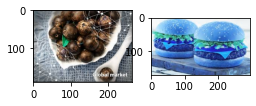

In [13]:
plt.subplot(131)
plt.imshow(tr_data[2][0])
print(tr_data[2][1])
plt.subplot(132)
plt.imshow(tr_data[151][0])
print(tr_data[151][1])
plt.show()

In [0]:
image1 = tr_data[2][0]
image2 = tr_data[151][0]

In [0]:
def feature_vector(image, size=(32, 32)):
# resize the image to a fixed size, then flatten the image into
# a list of raw pixel intensities
    return cv2.resize(image, size).flatten()

In [16]:
feature_vector(image1)

array([ 97, 105, 112, ..., 110, 113, 114], dtype=uint8)

In [17]:
feature_vector(image2)

array([249, 251, 252, ..., 149, 178, 193], dtype=uint8)

In [18]:
print("[INFO] describing images...")
print(len(os.listdir(path1)))
print(len(os.listdir(path2)))

[INFO] describing images...
51
51


In [0]:
def gray(image):
    image= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.imshow(image)

In [0]:
def otsu(image):
    image = image[0]
    image= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = threshold_otsu(image)
    binary = image > thresh

    fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
    ax = axes.ravel()
    ax[0] = plt.subplot(1, 3, 1)
    ax[1] = plt.subplot(1, 3, 2)
    ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Original')
    ax[0].axis('off')

    ax[1].hist(image.ravel(), bins=256)
    ax[1].set_title('Histogram')
    ax[1].axvline(thresh, color='r')

    ax[2].imshow(binary, cmap=plt.cm.gray)
    ax[2].set_title('Thresholded')
    ax[2].axis('off')

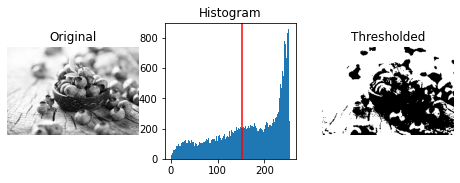

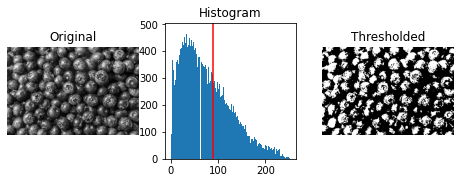

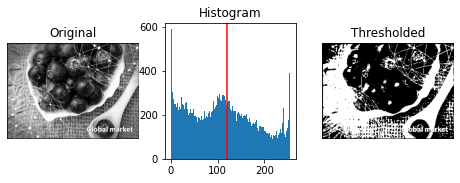

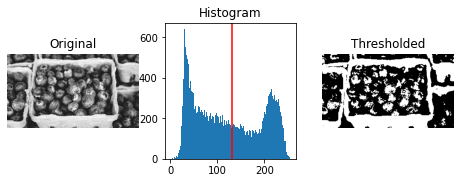

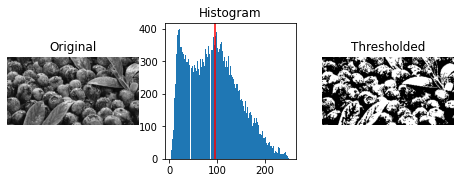

In [21]:
for image in tr_data[:5]:
    otsu(image)

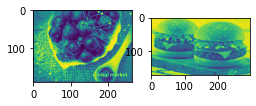

In [22]:
plt.subplot(231)
gray(image1)
plt.subplot(232)
gray(image2)
plt.show()

In [0]:
def edge_based_segmentation(image):
    im = cv2.cvtColor(image[0], cv2.COLOR_BGR2GRAY)
    edges = canny(im/255.)
    fill = ndi.binary_fill_holes(edges)
    plt.imshow(fill.astype('float'))

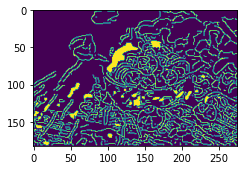

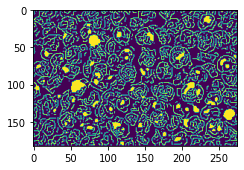

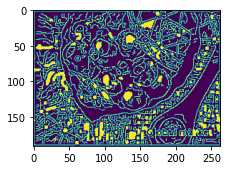

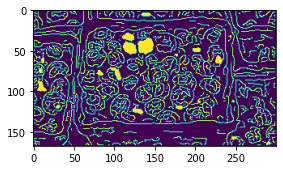

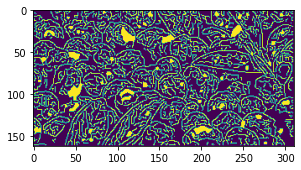

In [24]:
for image in tr_data[:5]:
    fig, axes = plt.subplots(ncols=1, figsize=(8, 2.5))
    edge_based_segmentation(image)
plt.show()

In [0]:
def hist(image):
    plt.subplot()
    ax = plt.hist(image)

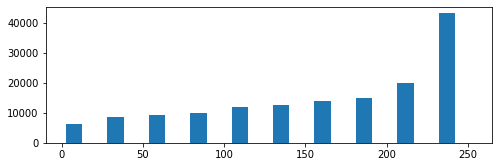

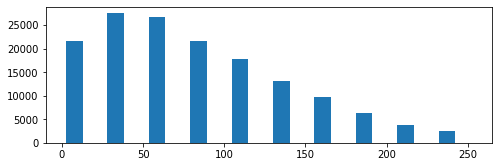

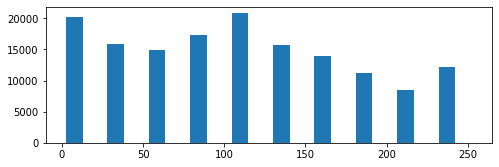

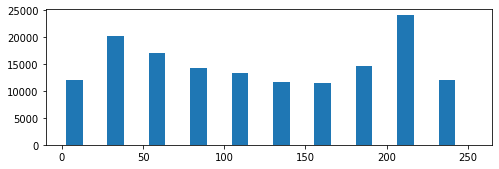

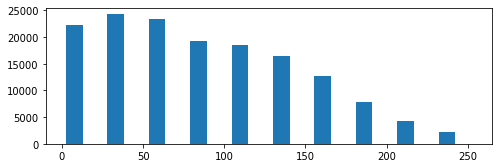

In [26]:
for image in tr_data[:5]:
    fig, axes = plt.subplots(ncols=1, figsize=(8, 2.5))
    hist(image)
plt.show()

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [0]:
feature_matrix = []
target = []
for x,y in tr_data:
    image= cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
    feature_matrix.append(image)
    target.append(y)

In [0]:
X=[]
IMG_SIZE= 32
for x in feature_matrix:
    new_array = cv2.resize(x,(IMG_SIZE,IMG_SIZE))
    X.append(new_array)

In [0]:
## normalization
Xx = []
for x in X:
    tmp = x/255
    Xx.append(tmp)

In [0]:
x_train,x_test,y_train,y_test = train_test_split(Xx,target)

In [0]:
nsamples, nx, ny = np.array(x_train).shape
x_train = np.array(x_train).reshape((nsamples,nx*ny))

nsamples, nx, ny = np.array(x_test).shape
x_test = np.array(x_test).reshape((nsamples,nx*ny))

In [33]:
neighbors = [1, 3, 5, 7, 9, 13]
for k in neighbors:
    model = KNeighborsClassifier(n_neighbors= k)
    model.fit(x_train, y_train)
    acc = model.score(x_test, y_test)
    print("[INFO] raw pixel accuracy: {:.2f}%".format(acc * 100))

[INFO] raw pixel accuracy: 87.18%
[INFO] raw pixel accuracy: 79.49%
[INFO] raw pixel accuracy: 71.79%
[INFO] raw pixel accuracy: 76.92%
[INFO] raw pixel accuracy: 74.36%
[INFO] raw pixel accuracy: 74.36%
